I was working on the exercises with Luc Testa.

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Creating my random dataset:

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X, y = make_regression()

Plotting my dataset

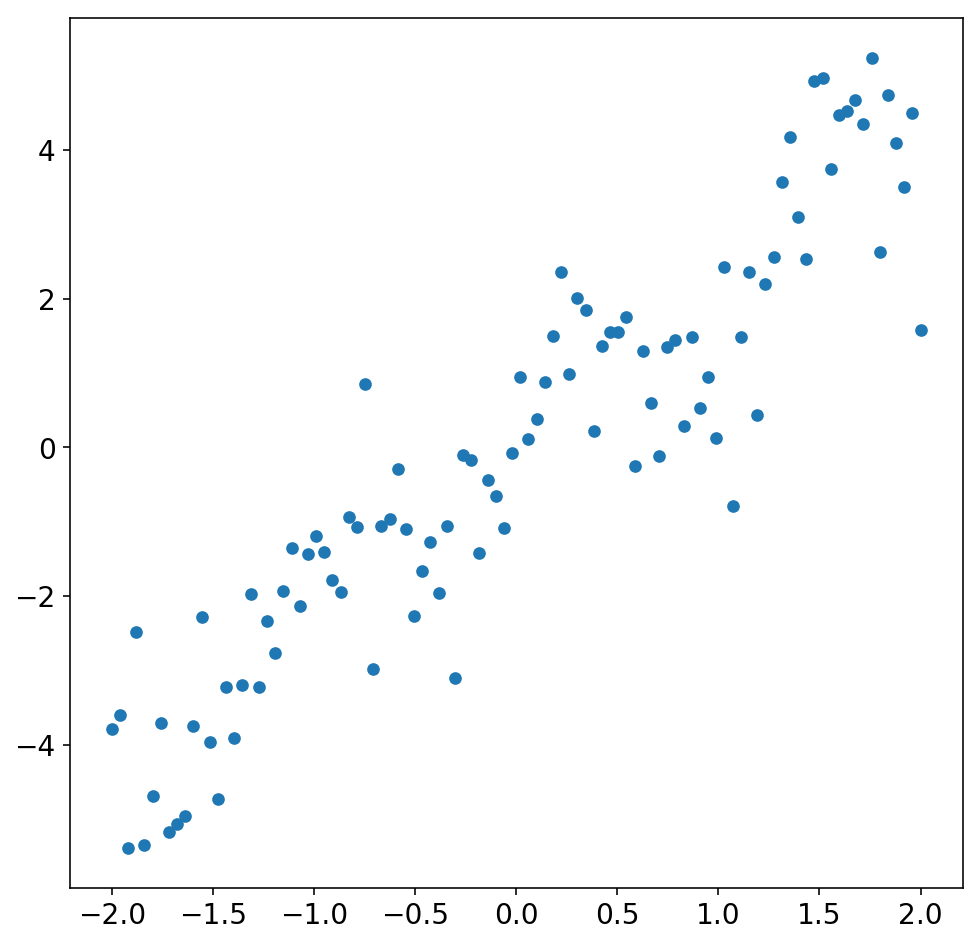

In [23]:
plt.scatter(X, y, lw=0, s=40)

Comparing the MSE of the kNN Regressor with different neighbour number.

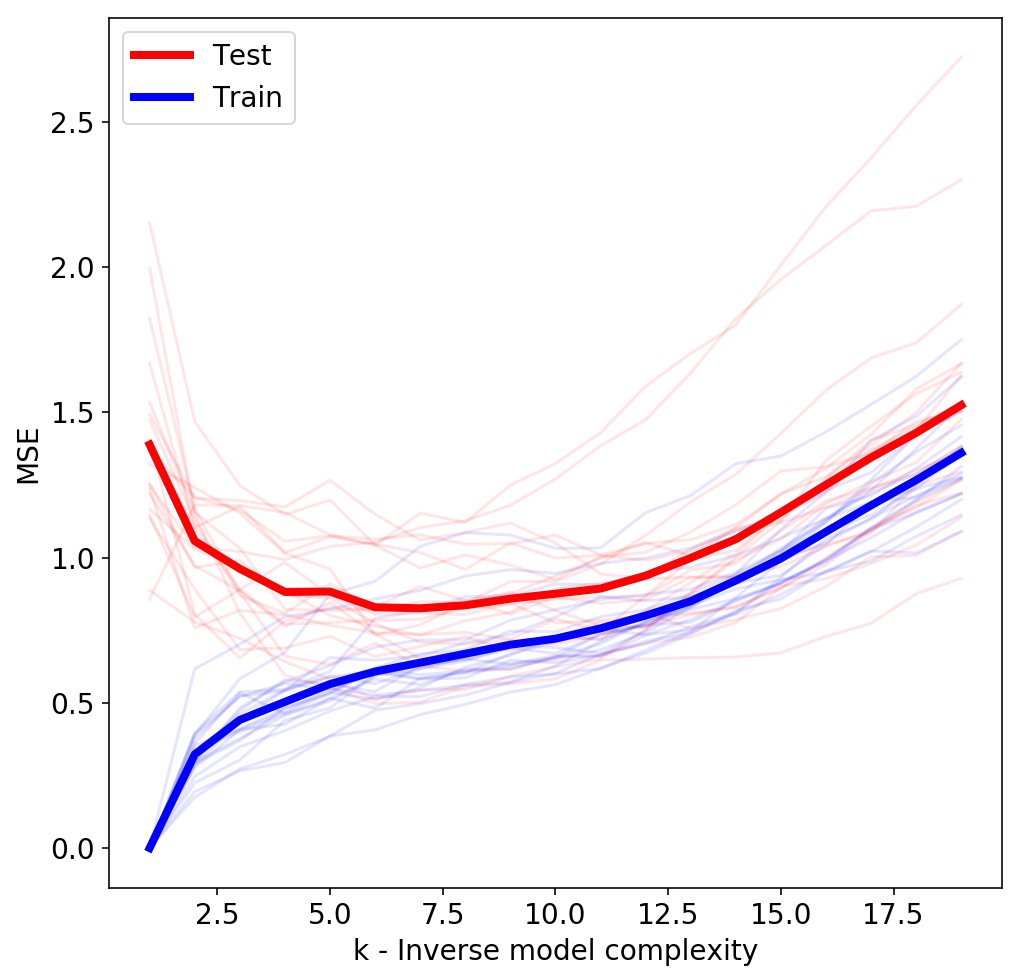

In [29]:
acc_T = []
acc_V = []
k_Nb = np.arange(1, 20, 1)

for n in range(20):
    X, y = make_regression(n_samples=100, noise_level=0.8, random_state=2+n)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.6)
    train_scores = []
    test_scores = []
    
    for k in k_Nb:
        rgr = KNeighborsRegressor(n_neighbors=k)
        rgr.fit(X_train, y_train)
        train_scores.append(mean_squared_error(y_train, rgr.predict(X_train)))
        test_scores.append(mean_squared_error(y_test, rgr.predict(X_test)))
        
    acc_T.append(test_scores)
    acc_V.append(train_scores)
    
    plt.plot(k_Nb, train_scores, c='b', alpha=0.1)
    plt.plot(k_Nb, test_scores, c='r', alpha=0.1)
    
plt.plot(k_Nb, np.array(acc_T).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(k_Nb, np.array(acc_V).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k - Inverse model complexity')
plt.ylabel('MSE')
plt.legend(loc='best')

1) The results are in agreement with the result of the first exercise. If we use k=1, we teach the datapoint to the model, so it will work perfectly on the training data, but it will fail during validation.

2) The plateau appears in this case too, siging an intermediate phase between teaching too many things to the model, and using a too simple one.